<a href="https://colab.research.google.com/github/HarikaSatti06112001/Code-our-souls/blob/main/CMPE255_Assignment2_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 4.3 MB/s 
     |████████████████████████████████| 17.0 MB 60.7 MB/s 
     |████████████████████████████████| 1.3 MB 49.7 MB/s 
     |████████████████████████████████| 1.7 MB 41.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 134 kB 48.4 MB/s 
     |████████████████████████████████| 10.4 MB 22.7 MB/s 
     |████████████████████████████████| 25.9 MB 1.4 MB/s 
     |████████████████████████████████| 2.0 MB 48.0 MB/s 
     |████████████████████████████████| 636 kB 42.9 MB/s 
     |████████████████████████████████| 3.3 MB 40.9 MB/s 
     |████████████████████████████████| 268 kB 58.8 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
     |███████████████████████████████

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload() 

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nagabathula","key":"7d804089a3ac8fb343251b2faadde02b"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c tabular-playground-series-jul-2022

 46% 9.00M/19.6M [00:00<00:00, 20.1MB/s]
100% 19.6M/19.6M [00:00<00:00, 39.2MB/s]


In [ ]:
!unzip /content/tabular-playground-series-jul-2022.zip

Archive:  /content/tabular-playground-series-jul-2022.zip
  inflating: data.csv                
  inflating: sample_submission.csv   


In [ ]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('/content/tabular-playground-series/data.csv')
dataset.shape

(98000, 30)

In [ ]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))



Data for Modeling: (93100, 30)
Unseen Data For Predictions: (4900, 30)


<bound method NDFrame.head of           id      f_00      f_01      f_02      f_03      f_04      f_05  \
0      97338 -1.218366 -1.688519  0.081250 -0.888575 -0.909226  2.444909   
1      93116  2.146463 -1.213698 -0.042490 -0.808254  3.024861 -0.100371   
2      66977 -0.875330 -0.720227  0.150188 -0.177621  0.338162  0.172424   
3      30671  0.368646  1.067729 -0.414968  0.214283  1.081841  1.820971   
4      78075  1.139519 -0.238937 -0.237502 -0.911857 -1.746878 -0.732871   
...      ...       ...       ...       ...       ...       ...       ...   
93095  61977  1.277672  0.728803 -0.880249 -2.369705 -0.412776  1.469933   
93096  27106 -0.747334  0.018670 -0.588228 -0.167959 -0.111417 -1.896970   
93097  26713  0.379359 -1.074160  1.401298  1.001310 -0.763155  1.223942   
93098  64837 -0.507624 -0.333651 -0.420454  1.290765  0.119017  0.385026   
93099  62432 -1.107226 -0.113429  0.775115 -0.290805 -1.593892 -0.157068   

           f_06  f_07  f_08  ...      f_19      f_20     

In [ ]:
from pycaret.clustering import *

exp_clu101 = setup(data, normalize = True, 
                   ignore_features = ['id'],
                   session_id = 123)

Description                 Value
0                               session_id                   123
1                            Original Data           (93100, 30)
2                           Missing Values                 False
3                         Numeric Features                    29
4                     Categorical Features                     0
5                         Ordinal Features                 False
6                High Cardinality Features                 False
7                  High Cardinality Method                  None
8                         Transformed Data           (93100, 29)
9                                 CPU Jobs                    -1
10                                 Use GPU                 False
11                          Log Experiment                 False
12                         Experiment Name  cluster-default-name
13                                     USI                  b14f
14                         Imputation Type                simple
15          Iterative Imputation Iteration                  None
16                         Numeric Imputer                  mean
17      Iterative Imputation Numeric Model                  None
18                     Categorical Imputer                  mode
19  Iterative Imputation Categorical Model                  None
20           Unknown Categoricals Handling        least_frequent
21                               Normalize                  True
22                        Normalize Method                zscore
23                          Transformation                 False
24                   Transformation Method                  None
25                                     PCA                 False
26                              PCA Method                  None
27                          PCA Components                  None
28                     Ignore Low Variance                 False
29                     Combine Rare Levels                 False
30                    Rare Level Threshold                  None
31                         Numeric Binning                 False
32                         Remove Outliers                 False
33                      Outliers Threshold                  None
34                Remove Multicollinearity                 False
35             Multicollinearity Threshold                  None
36             Remove Perfect Collinearity                 False
37                              Clustering                 False
38                    Clustering Iteration                  None
39                     Polynomial Features                 False
40                       Polynomial Degree                  None
41                    Trignometry Features                 False
42                    Polynomial Threshold                  None
43                          Group Features                 False
44                       Feature Selection                 False
45                Feature Selection Method               classic
46            Features Selection Threshold                  None
47                     Feature Interaction                 False
48                           Feature Ratio                 False
49                   Interaction Threshold                  None

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True,
                                      features_todrop=['id'], id_columns=[],
                                      ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numerical=...
                ('P_transform', 'passthrough'), ('binn', 'passthrough'),
                ('rem_outliers', 'passthrough'), ('cluster_all', 'passthrough'),
              

In [ ]:
kmeans = create_model('kmeans')

Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.0368          2994.1982          4.2699            0           0   

   Completeness  
0             0

INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
kmodes = create_model('kmodes', num_clusters = 6)

Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0     -0.0077            15.4862         52.5014            0           0   

   Completeness  
0             0

INFO:logs:create_model_container: 2
INFO:logs:master_model_container: 2
INFO:logs:display_container: 3
INFO:logs:KModes(cat_dissim=<function matching_dissim at 0x7f2ab518bc20>, init='Cao',
       max_iter=100, n_clusters=6, n_init=1, n_jobs=-1, random_state=123,
       verbose=0)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
models()

INFO:logs:gpu_param set to False


Name  \
ID                                            
kmeans                   K-Means Clustering   
ap                     Affinity Propagation   
meanshift             Mean Shift Clustering   
sc                      Spectral Clustering   
hclust             Agglomerative Clustering   
dbscan     Density-Based Spatial Clustering   
optics                    OPTICS Clustering   
birch                      Birch Clustering   
kmodes                   K-Modes Clustering   

                                                   Reference  
ID                                                            
kmeans                        sklearn.cluster._kmeans.KMeans  
ap         sklearn.cluster._affinity_propagation.Affinity...  
meanshift              sklearn.cluster._mean_shift.MeanShift  
sc              sklearn.cluster._spectral.SpectralClustering  
hclust     sklearn.cluster._agglomerative.AgglomerativeCl...  
dbscan                        sklearn.cluster._dbscan.DBSCAN  
optics                        sklearn.cluster._optics.OPTICS  
birch                           sklearn.cluster._birch.Birch  
kmodes                                  kmodes.kmodes.KModes

In [ ]:
kmean_results = assign_model(kmeans)
kmean_results.head()

INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0), transformation=False, score=True, verbose=True)
INFO:logs:Checking exceptions
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : K-Means Clustering
INFO:logs:Copying data
INFO:logs:(93100, 31)
INFO:logs:assign_model() succesfully completed......................................


id      f_00      f_01      f_02      f_03      f_04      f_05  \
0  97338 -1.218366 -1.688519  0.081250 -0.888575 -0.909226  2.444909   
1  93116  2.146463 -1.213698 -0.042490 -0.808254  3.024861 -0.100371   
2  66977 -0.875330 -0.720227  0.150188 -0.177621  0.338162  0.172424   
3  30671  0.368646  1.067729 -0.414968  0.214283  1.081841  1.820971   
4  78075  1.139519 -0.238937 -0.237502 -0.911857 -1.746878 -0.732871   

       f_06  f_07  f_08  ...      f_20      f_21      f_22      f_23  \
0 -0.098087    10     1  ... -0.667711 -0.980620  1.833901 -0.624481   
1  0.635183    11     8  ...  0.240270  1.639806 -1.987155  0.059093   
2  0.856310     7     7  ... -0.334855 -0.871563  0.256715 -0.586163   
3  0.070856     6     7  ...  0.122573  1.881559  0.261403  0.290443   
4  0.662648     1    10  ... -0.442934 -0.260949 -1.590540  0.162905   

       f_24      f_25      f_26      f_27      f_28    Cluster  
0 -1.980218  0.339835 -0.933159 -0.174867  2.303047  Cluster 2  
1 -0.571612  0.419755  2.554325 -0.642722  1.600061  Cluster 1  
2 -0.966136  2.018151 -0.368517  0.657300  0.452582  Cluster 2  
3  1.106266  1.635685  1.909614  1.025352 -1.983344  Cluster 3  
4 -1.084134 -0.858327  2.633026 -1.255541  1.737923  Cluster 0  

[5 rows x 31 columns]

In [ ]:
plot_model(kmeans)

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


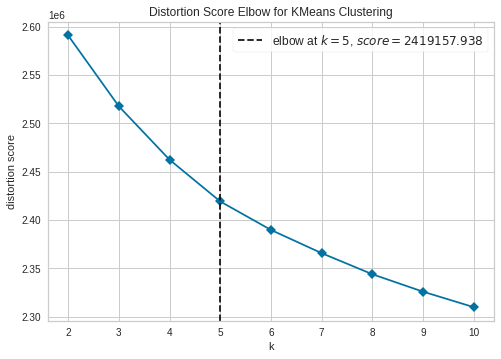

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(kmeans, plot = 'elbow')

In [ ]:
plot_model(kmeans, plot = 'distribution')

INFO:logs:Rendering Visual


In [ ]:
unseen_predictions = predict_model(kmeans, data=data_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0), ml_usecase=MLUsecase.CLUSTERING)


id      f_00      f_01      f_02      f_03      f_04      f_05      f_06  \
0   5 -0.888945 -1.121026  0.988608  0.224778  1.655074 -1.274271  0.371443   
1  12 -0.623781 -1.876162 -1.676969  0.120796  0.051265 -0.947185 -0.116048   
2  54  1.090390 -0.104674 -0.288262  0.554895  0.664188 -1.058096  0.456833   
3  57  0.165214 -0.925887  1.581359 -0.992012  0.331891 -0.365796 -2.437217   
4  72 -0.852804  1.399708  0.831912  0.106327  1.235630 -1.506150 -0.081980   

   f_07  f_08  ...      f_20      f_21      f_22      f_23      f_24  \
0     4     1  ... -0.102945  0.207033 -1.722848 -0.725888  1.443133   
1     4     7  ...  0.567472 -0.070791 -1.142656  0.266928 -1.225742   
2     8     4  ... -0.488645 -1.597177 -0.712017 -2.285320 -1.122432   
3     6     0  ...  0.638411 -1.209301  0.378406  2.164613 -0.472959   
4     4     2  ...  1.417682  2.020412 -2.207374  0.725378 -0.731417   

       f_25      f_26      f_27      f_28    Cluster  
0  0.432677 -1.509854  0.731389  0.330909  Cluster 3  
1  0.625137  0.646457 -1.376519 -1.273619  Cluster 0  
2  0.207539  1.183288  1.251253 -0.797418  Cluster 2  
3  0.849777 -2.229595  0.346029  1.834854  Cluster 3  
4 -0.697750 -0.288021 -0.035403  0.808565  Cluster 1  

[5 rows x 31 columns]

In [ ]:
save_model(kmeans,'Final KMeans Model 08Sep2022')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0), model_name=Final KMeans Model 08Sep2022, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True,
                                      features_todrop=['id'], id_columns=[],
                                      ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                          

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['id'], id_columns=[],
                                       ml_usecase='regression',
                                       numerical_features=[],
                                       target='UNSUPERVISED_DUMMY_TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numerical=...
                 ('fix_perfect', 'passthrough'),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 